In [2]:
import uproot
import ROOT
import numpy as np
import pandas as pd
from collections import OrderedDict

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['grid.linestyle'] = ':'

Welcome to JupyROOT 6.12/04


In [3]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)

In [4]:
def extract_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    ROOT.gPad.Update()
    
    tot = eff.GetTotalHistogram()
    nBins = tot.GetNbinsX()
    xx = []
    yy = []
    yl = []
    yu = []
    for i in range(1, nBins+1):
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 0 and eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)) == 1.: continue
        if eff.GetEfficiency(eff.GetGlobalBin(i)) == 1. and eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)) == 1.: continue
        
        xx.append(tot.GetXaxis().GetBinCenter(i))
        yy.append(eff.GetEfficiency(eff.GetGlobalBin(i)))
        yl.append(eff.GetEfficiencyErrorLow(eff.GetGlobalBin(i)))
        yu.append(eff.GetEfficiencyErrorUp(eff.GetGlobalBin(i)))
                  
    
    return {'x': np.array(xx),
            'y': np.array(yy),
            'yerr': np.array([yl, yu])}

Fit function $f(x) = \frac{1}{1+e^{-p_{0} (x - p_{1})}}  p_{2}$

In [5]:
def extract_fitParam_from_teffi(eff):
    _ = ROOT.TCanvas()
    eff.Draw()
    
    myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1])))', 0, 60)
    myfit.SetParameters(0.02, 4, 0.02)
    eff.Fit(myfit)

    return [myfit.GetParameter(i) for i in range(3)]

In [6]:
ctau = '1'

dfs = OrderedDict({
#     1 : uproot.open('/uscms/homes/m/mreid/CRAB/CMSSW_9_4_9/src/Firefighter/washAOD/output/output_Mchi-60_dMchi-20_1mm.root')['TRIG_dsa2/trigEffiForMetTrack']
    5.25 : uproot.open(f'../Firefighter/washAOD/Mchi-5p25_dMchi-0p5_ctau-{ctau}.root')['TRIG_dsa/trigEffiForMuTrack'].pandas.df(),
    6 : uproot.open(f'../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-{ctau}.root')['TRIG_dsa/trigEffiForMuTrack'].pandas.df(),
    52.5 : uproot.open(f'../Firefighter/washAOD/Mchi-52p5_dMchi-5_ctau-{ctau}.root')['TRIG_dsa/trigEffiForMuTrack'].pandas.df(),
    60 : uproot.open(f'../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-{ctau}.root')['TRIG_dsa/trigEffiForMuTrack'].pandas.df(),
})

numEvents = OrderedDict({
    5.25 : uproot.open(f'../Firefighter/washAOD/Mchi-5p25_dMchi-0p5_ctau-{ctau}.root')['TRIG_dsa/overallInfo'].pandas.df(),
    6 : uproot.open(f'../Firefighter/washAOD/Mchi-6p0_dMchi-2p0_ctau-{ctau}.root')['TRIG_dsa/overallInfo'].pandas.df(),
    52.5 : uproot.open(f'../Firefighter/washAOD/Mchi-52p5_dMchi-5_ctau-{ctau}.root')['TRIG_dsa/overallInfo'].pandas.df(),
    60 : uproot.open(f'../Firefighter/washAOD/Mchi-60_dMchi-20_ctau-{ctau}.root')['TRIG_dsa/overallInfo'].pandas.df(),
})

In [6]:
len(numEvents[1000])

285573

In [7]:
df = dfs[1000]
recoDf = df.dropna()
df

fired          pt       eta       phi    genJetPt   recoJetPt  \
entry subentry                                                                  
0     0         False   22.594122 -1.161453  1.325337   85.165459   80.981873   
      1           NaN   10.920097 -1.215553  0.960326         NaN         NaN   
1     0         False   14.663152  1.759149  1.776939   65.096153   50.136116   
      1           NaN    5.532141  1.779996 -2.942117         NaN         NaN   
2     0         False   16.152464  0.580958 -1.923241   88.390663   88.837288   
      1           NaN   14.671969  0.136596 -1.632516         NaN         NaN   
3     0         False   14.476450 -0.671500  1.791976   45.364258   37.361900   
      1           NaN    7.511632 -1.148144  2.685784         NaN         NaN   
4     0         False    7.411016 -0.639377  0.718829  190.815048  164.397537   
      1           NaN    7.267887 -0.095178 -0.197945         NaN         NaN   
5     0         False  118.108223 -1.221609 -1.763645  619.037659  569.721130   
      1           NaN    7.909960 -0.978978 -1.919461         NaN         NaN   
      2           NaN    3.471501 -1.789515 -0.171417         NaN         NaN   
6     0         False   17.632694 -0.125122 -1.007971   36.972282   33.629883   
      1           NaN    5.729091 -0.194551 -1.102281         NaN         NaN   
7     0         False   15.222302 -1.303619  2.565099   61.626297   56.586693   
      1           NaN   12.939628 -1.517119  1.562356         NaN         NaN   
8     0         False   14.031220  1.973948  1.748997   36.446140   36.763058   
      1           NaN   10.332347  1.226289  0.528733         NaN         NaN   
      2           NaN    6.073290  1.473559  1.368598         NaN         NaN   
9     0         False   22.223856 -1.291384  2.508983   68.621964   63.999485   
      1           NaN   16.283255 -1.326042 -3.062883         NaN         NaN   
10    0         False   19.153202 -1.442481  0.310262   49.123741   39.563324   
      1           NaN   10.850967 -1.595372  0.156406         NaN         NaN   
11    0         False   41.576340  0.238264 -0.512660   45.694942   37.429169   
      1           NaN    8.358191  0.567147 -0.762898         NaN         NaN   
12    0         False   20.694544  0.841270 -1.686730  114.823357  124.081345   
      1           NaN   11.166090  1.262765 -1.158753         NaN         NaN   
13    0         False   23.095539  0.720864  0.709615   91.724777   77.079910   
      1           NaN    9.769394  1.136181  0.414502         NaN         NaN   
...               ...         ...       ...       ...         ...         ...   
25876 0         False   37.931713  0.420967  0.251633  154.301697  146.350220   
      1           NaN   14.341295  0.813794  0.666156         NaN         NaN   
25877 0         False   14.770013 -0.064552  1.654743   75.463181   76.363602   
      1           NaN   10.488009  1.153286  1.496994         NaN         NaN   
25878 0         False    8.666107  0.343773 -2.838618   39.747437   33.701511   
      1           NaN    7.017943  0.094155 -0.235199         NaN         NaN   
25879 0         False   23.878517 -0.218420  2.943809  170.684982  151.722916   
      1           NaN    8.687598 -0.924602 -2.666406         NaN         NaN   
25880 0         False    5.291821  0.033342  1.776363   30.869871   30.224710   
      1           NaN    5.165119  1.443151 -2.108299         NaN         NaN   
25881 0         False   16.358353  1.617875  2.970509  111.977394  102.507416   
      1           NaN   15.202090  1.338527  2.552739         NaN         NaN   
25882 0         False    9.167184  0.431345  2.316308   50.616989   39.805084   
      1           NaN    8.595675  0.577922  0.449264         NaN         NaN   
25883 0         False    6.870216  0.717315  0.909678   57.494473   48.209518   
      1           NaN    5.447115 -0.055989 -0.430516         NaN         NaN   
25884 0         False   15.249247 -0.137652  1.

In [7]:
_dict = {}
_numEvents = {}
for k, df in dfs.items():
    _counts = df['fired'].value_counts()
    #_counts /= _counts.sum()
    _dict[k] = _counts
    _numEvents[k] = len(numEvents[k])
    
evDf = pd.DataFrame(_dict).rename(index={0:'Initial selection', 1:'Triggered'})
evDf = evDf.append(pd.DataFrame([_numEvents]).rename(index={0:'All events'}))
evDf

,5.25,6.0,52.5,60.0
Initial selection,66,2702,1756,19177
Triggered,6,39,227,8833
All events,235156,285451,194340,272990


In [18]:
_numEvents

{1: 272990, 10: 286624, 100: 285737, 1000: 285573}

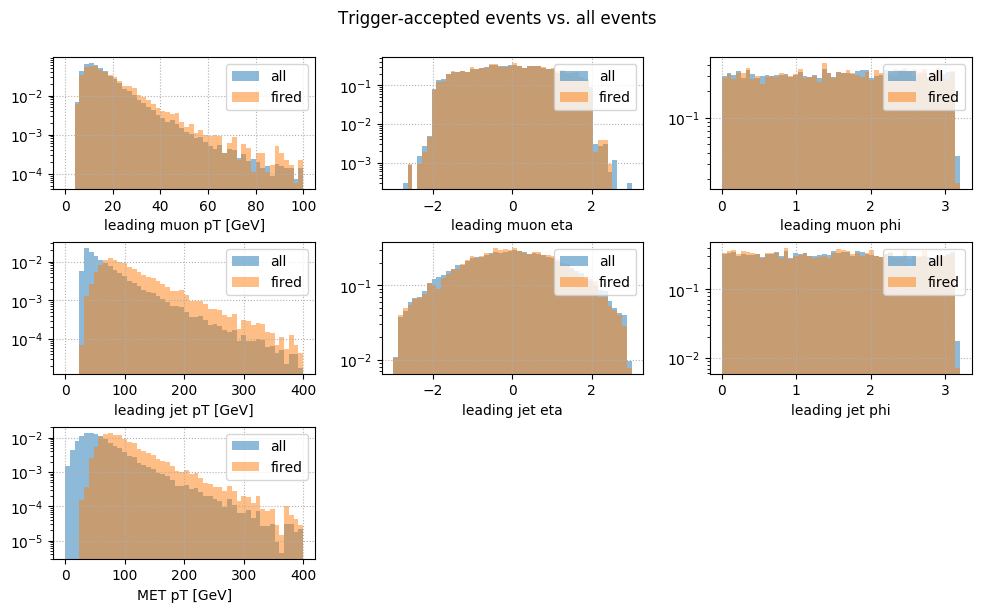

In [11]:
df = dfs[60]
recoDf = dfs[60].dropna()
query = 'fired == True'
fig, axes = plt.subplots(3,3, figsize=(10,6))

fig.suptitle("Trigger-accepted events vs. all events")
plt.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.90)

axes[2, 1].axis('off')
axes[2, 2].axis('off')

labels = [['leading muon pT [GeV]', 'leading muon eta', 'leading muon phi'], \
          ['leading jet pT [GeV]', 'leading jet eta', 'leading jet phi'], \
          ['MET pT [GeV]']]

ranges = [[[0,100], [-3,3], [0,3.2]], \
          [[0,400], [-3,3], [0,3.2]], \
          [[0,400]]]

variables = [['pt', 'eta', 'phi'], \
             ['recoJetPt', 'recoJetEta', 'recoJetPhi'], \
             ['recoPFMetPt']]

properties = {'bins':50, 'density':True, 'log':True, 'alpha':0.5}

for i in range(len(labels)):
    for (j, label) in enumerate(labels[i]):
        properties['range'] = (ranges[i][j])
        properties['label'] = 'all'
        axes[i,j].hist(recoDf[variables[i][j]][:,0], **properties)
        properties['label'] = 'fired'
        axes[i,j].hist(recoDf.query(query)[variables[i][j]], **properties)
        axes[i,j].set_xlabel(label)
        axes[i,j].legend(loc='upper right')
        axes[i,j].grid()

### Trigger efficiency of `HLT_DoubleMu3_DCA_PFMET50_PFMHT60` vs kinematic variables

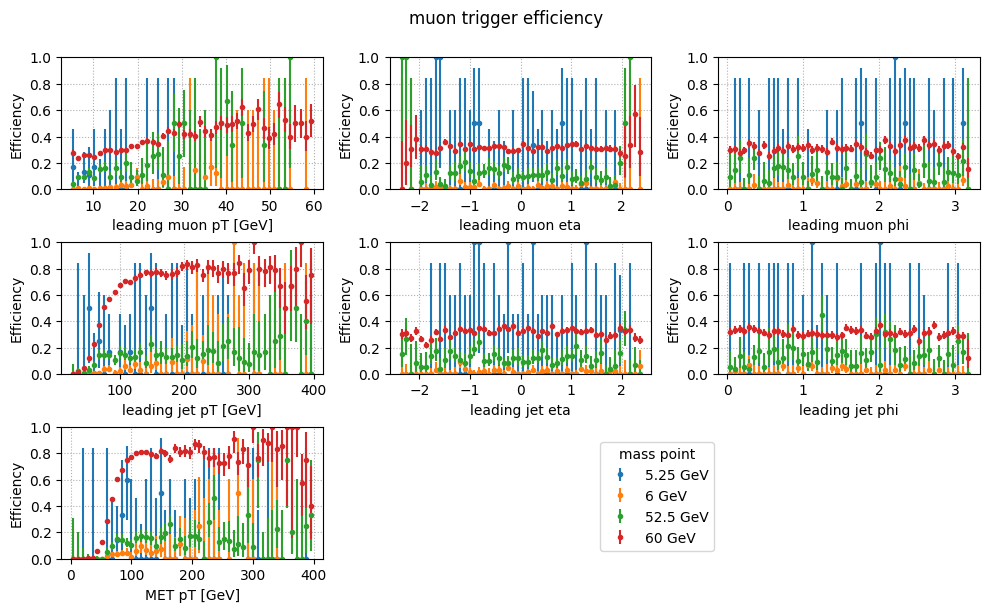

In [12]:
fig, axes = plt.subplots(3,3, figsize=(10,6))
fig.suptitle('muon trigger efficiency')
plt.tight_layout(h_pad=2.0)
fig.subplots_adjust(top=0.90)

axes[2,1].axis('off')
axes[2,2].axis('off')

labels = [['leading muon pT [GeV]', 'leading muon eta', 'leading muon phi'], \
          ['leading jet pT [GeV]', 'leading jet eta', 'leading jet phi'], \
          ['MET pT [GeV]']]

ranges = [[[0,60], [-2.4,2.4], [0,3.2]], \
          [[0,400], [-2.4,2.4], [0,3.2]], \
          [[0,400]]]

variables = [['pt', 'eta', 'phi'], \
             ['recoJetPt', 'recoJetEta', 'recoJetPhi'], \
             ['recoPFMetPt']]

for i in range(len(labels)):
    for (j, label) in enumerate(labels[i]):
        for k, df in dfs.items():
            
            if 'h0' in locals():
                del h0,h1
                
            h0 = ROOT.TH1F(f'h0_1', '', 50, ranges[i][j][0], ranges[i][j][1])
            h1 = ROOT.TH1F(f'h1_1', '', 50, ranges[i][j][0], ranges[i][j][1])

            for l,x in df[variables[i][j]][:,0].iteritems():
                h0.Fill(x)
            for l,x in df.query(query)[variables[i][j]][:,0].iteritems():
                h1.Fill(x)

            eff = ROOT.TEfficiency(h1, h0)
            data = extract_teffi(eff)

            axes[i,j].errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label=f'{k} GeV', ms=3)

            axes[i,j].set_xlabel(labels[i][j])
            axes[i,j].set_ylabel('Efficiency')
            axes[i,j].yaxis.set_major_locator(plt.MaxNLocator(5))
            axes[i,j].set_ylim((0,1))
            axes[i,j].grid(True)
    
fig.legend(loc=(0.6,0.1), title='mass point')

In [30]:
import scipy.special
from scipy.optimize import curve_fit, fsolve
def func(z,p0,p1,p2,p3):
    return p2 + p3*scipy.special.erf((z-p0)/p1)
def func2(z, p0, p1, p2, p3, p4):
    return func(z, p0, p1, p2, p3) - p4*0.98

all_mins = [0]
all_maxs = [10]
all_vars = ['genPt','recoPt']
all_xlabels = ['$p_{T}$ [GeV]']
all_colors = {5.25:'C0', 6:'C1', 52.5:'C2', 60:'C3'}

def make_plot(ax, k, df, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F(f'h0_{k}', '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F(f'h1_{k}', '', nbins, binIni, binEnd)
    for l,x in df[variable][:,0].iteritems():
        h0.Fill(x)
    for l,x in df.query(query)[variable][:,0].iteritems():
        h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], label=f'{k} GeV', fmt=all_colors[k]+'o', markersize=3, alpha=0.3)

def make_plot_fit(ax, k, df, variable, nbins, binIni, binEnd):
    h0 = ROOT.TH1F(f'h0_{k}', '', nbins, binIni, binEnd)
    h1 = ROOT.TH1F(f'h1_{k}', '', nbins, binIni, binEnd)
    for l,x in df[variable][:,0].iteritems():
        h0.Fill(x)
    for l,x in df.query(query)[variable][:,0].iteritems():
        h1.Fill(x)
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt=all_colors[k]+'o', markersize=3, alpha=0.3)
#     if variable == 'genPt':
    maxbin = 40
    popt, pcov = curve_fit(func, data['x'][0:maxbin], data['y'][0:maxbin])
    percentile98 = fsolve(func2, 100, (popt[0], popt[1], popt[2], popt[3], popt[2]+popt[3]))
    ax.plot(data['x'][0:maxbin], func(data['x'][0:maxbin], *popt), all_colors[k], \
            label=f'{k} GeV, max. = {popt[2]+popt[3]:.2f}, pT @ 98% = {percentile98[0]:.2f}')

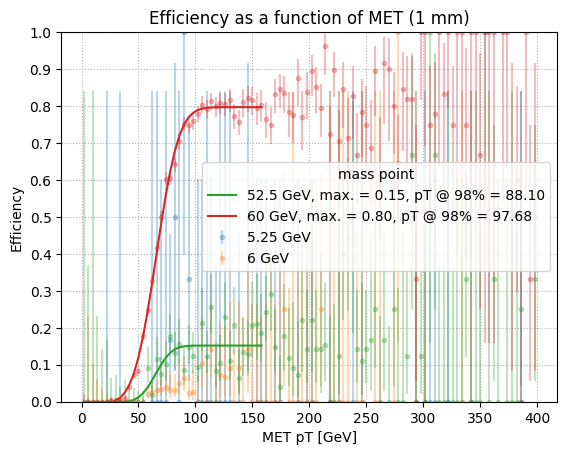

In [31]:
fig, ax = plt.subplots()
make_plot(ax, 5.25, dfs[5.25], 'recoPFMetPt', 100, 0, 400)
make_plot(ax, 6, dfs[6], 'recoPFMetPt', 100, 0, 400)
make_plot_fit(ax, 52.5, dfs[52.5], 'recoPFMetPt', 100, 0, 400)
make_plot_fit(ax, 60, dfs[60], 'recoPFMetPt', 100, 0, 400)

ax.set_xlabel('MET pT [GeV]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='mass point')
ax.set_title("Efficiency as a function of MET (1 mm)")
ax.grid()

### trigger efficiency itself

In [ ]:
trees = OrderedDict({
    0.1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p20e-03_100k.root')['TRIGself_dsa/trigSelfEffiForMuTrack'],
      1 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p012_100k.root'   )['TRIGself_dsa/trigSelfEffiForMuTrack'],
     10 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p12_100k.root'    )['TRIGself_dsa/trigSelfEffiForMuTrack'],
     50 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-0p6_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack'],
    100 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-1p2_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack'],
    300 : uproot.open('../Firefighter/washAOD/test/2017/SIDMmumu_Mps-200_MZp-1p2_ctau-3p6_100k.root'     )['TRIGself_dsa/trigSelfEffiForMuTrack']     
})

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

fitResult = {}
for k, t in trees.items():
    d = t.array('pt')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, 0, 100)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, 0, 100)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)
    fitResult[k] = extract_fitParam_from_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='o', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$p_{T}$ [GeV]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')
ax.grid()

print(pd.Series({k: fitResult[k][-1] for k in fitResult})) # not very accurate, need adjust initial parameters for each turn-on curve
pd.DataFrame(fitResult)

In [ ]:
c = ROOT.TCanvas()

t = trees[0.1]
d = t.array('pt')
start = d.starts
denom = d.content[start+2]
fd = t.array('fired')
numer = d.content[start[fd]+2]
    
h0 = ROOT.TH1F(f'h0_{k}', '', 50, 0, 100)
h1 = ROOT.TH1F(f'h1_{k}', '', 50, 0, 100)
for x in np.nditer(denom): h0.Fill(x)
for x in np.nditer(numer): h1.Fill(x)
        
eff = ROOT.TEfficiency(h1, h0)

# print(extract_teffi(eff))

eff.Draw()

# myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1]))) + [3]', 0, 60)
myfit = ROOT.TF1('myfit_', '[2]/(1+exp(-[0]*(x-[1])))', 0, 60)

myfit.SetParameters(0.2, 5, 0.9)
eff.Fit(myfit)

c.Draw()

for i in range(3):
    print('%.6f'%myfit.GetParameter(i))
# print(myfit.GetParameter(2)+ myfit.GetParameter(3))

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))

for k, t in trees.items():
    d = t.array('eta')
    start = d.starts
    denom = d.content[start+2]
    fd = t.array('fired')
    numer = d.content[start[fd]+2]
    
    h0 = ROOT.TH1F(f'h0_{k}', '', 50, -2.0, 2.0)
    h1 = ROOT.TH1F(f'h1_{k}', '', 50, -2.0, 2.0)
    for x in np.nditer(denom): h0.Fill(x)
    for x in np.nditer(numer): h1.Fill(x)
        
    eff = ROOT.TEfficiency(h1, h0)
    data = extract_teffi(eff)

    ax.errorbar(x=data['x'], y=data['y'], yerr=data['yerr'], fmt='^:', label=f'{k} cm')
    
ax.set_title('muon trigger efficiency')
ax.set_xlabel('$\eta$')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.legend(loc='best', title='decay length')
ax.grid()

### Trigger efficiency as a function of dark photon's decay length

In [ ]:
dl = np.array([0.1, 1.0, 10., 50., 100., 300.])
eff = {
    'HLT_TrkMu16_DoubleTrkMu6NoFiltersNoVtx': np.array([0.968306, 0.960976, 0.409801, 0.043403, 0.013889, 0.003499])
}

fig, ax = plt.subplots(figsize=(10,8))

for l, v in eff.items():
    ax.semilogx(dl, v, 'o--', label=l)
ax.legend(loc='best')
ax.set_title("muon trigger efficiency (from plateau of turn-on curve's fit)")
ax.set_xlabel('$\gamma_{d}$ decay length [cm]')
ax.set_ylabel('Efficiency')
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
ax.set_ylim((0,1))
ax.grid()

pd.DataFrame(data=eff, index=dl).T